In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

from typing import List

In [2]:
X, y = make_moons(n_samples=4000, noise=0.25, random_state=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


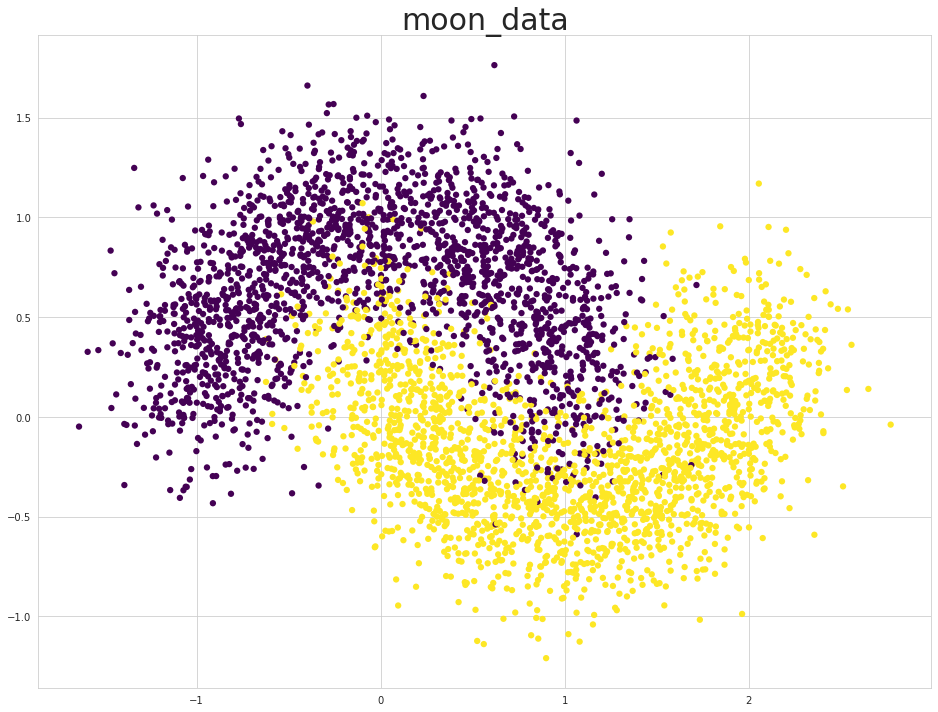

In [5]:
def make_plot(x, y, plot_name, XX=None, YY=None, preds=None):
    fig = plt.figure(figsize=(16, 12))
    sns.set_style("whitegrid")
    plt.gca()
    plt.title(plot_name, fontsize=30)
    
    if XX is not None and YY is not None and preds is not None:
        plt.contourf(
            XX, YY, preds.reshape(XX.shape), 25 ,alpha=0.08, cmap=plt.get_cmap("viridis"), vmin=0, vmax=0.6
        )
    
    # 绘制正负样本
    markers = ['o' if i==1 else 's' for i in y.ravel()]
    plt.scatter(x[:, 0,], x[:, 1], c=y.ravel(), s=40, edgecolors="None", cmap=plt.get_cmap("viridis"))
    plt.show()
    
make_plot(X, y, "moon_data")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_50 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_55 (Dense)             (None, 32)              

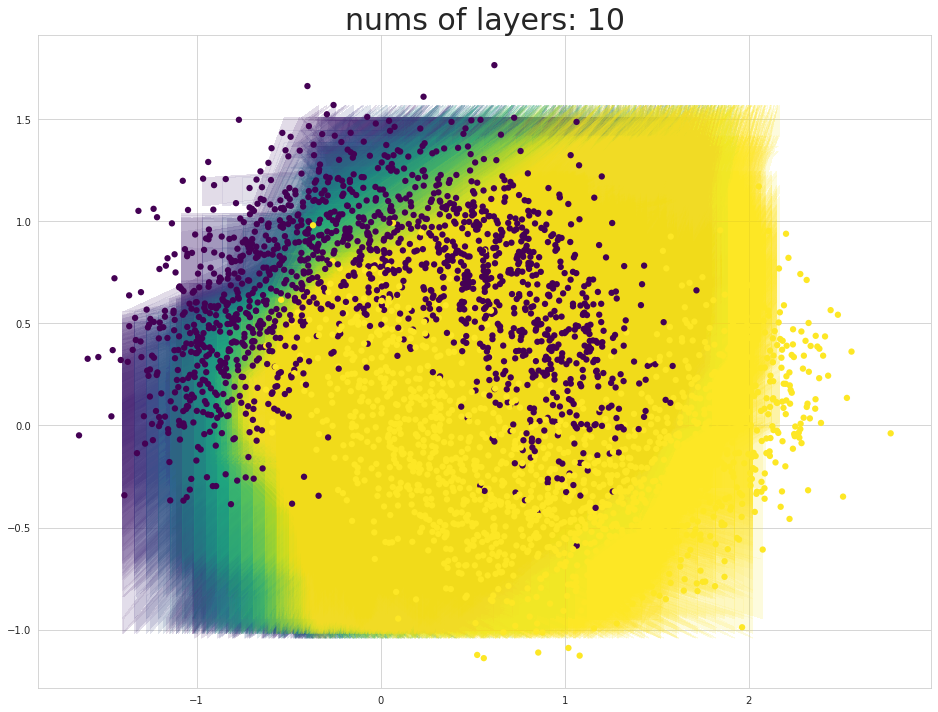

In [15]:
# 网络层数对模型的影响

# 构建5个层数不相同的网络结构
# for i in range(1):
model = keras.models.Sequential()

model.add(layers.Dense(8, input_dim=2, activation='relu'))
for _ in range(10):
    model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile( 
    loss=keras.losses.binary_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
) 

model.summary()
history = model.fit(X_train, y_train, epochs=10, verbose=1)

print(X_test[:100, 0].shape)
XX, YY = np.meshgrid(X_test[:300, 0], X_test[:300, 1])
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
title = f"nums of layers: {10}"
make_plot(X_train, y_train, title, XX, YY, preds)
